# Machine Learning - Clustering

Notes and examples from Udacity's Introduction to Machine Learning Course.

## Clustering
Clustering is a form of unsupervised learning, meaning that the input data does not contain features and labels associated to it.  The objective therefore, is to identify groups or classes of like data centered around a common point, or centroid, which define distinct clusters that can then be used to identify potentially similar data added later. 

One of the most popular algorithms for clustering is K-means.

### K-Means

[Scikit Learn](http://scikit-learn.org/stable/modules/clustering.html#k-means) page on K-Means

[Wiki](https://en.wikipedia.org/wiki/K-means_clustering) page on K-Means

[K-Means visualization](http://www.naftaliharris.com/blog/visualizing-k-means-clustering/) page

The K-Means algorithm works by optimizing the placement of a specified number of centroids within a data set to effectively classify like data points.  This is achieved by minimizing the inertia, or within cluster sum of squares error, which is a measure of how coherent each cluster is.

Although very powerful, the K-Means algorithm has a few drawbacks that need to be kept in mind.  First, is that it assumes the data clusters are isotropic, it does not handle elongate and anisotropic data well.  Second, and most importantly, since it is a hill climbing method the algorithm has potential to get stuck in local minimum and is thus very sensitive to the initial placements of the centroids.  It is very easy and possible to arrive at an incorrect solution that mathematically makes sense; multiple starting positions need to be explored.

#### Parameters to Optimize
**'n_clusters'**: this is the most important parameter, it sets the number of clusters for the data; default is 8

**'max_iter'**: this is the number of times the algorithm will move each centroid in an attempt to minimize the inertia; the default value of 300 is usually good

**'n_int'**: this is the number of times the algorithm will be rerun with new initial centroid starting locations; default is 10


### Exploring the Enron Dataset With K-Means



In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import sys
%cd /Users/IanDeniset/Documents/Courses/Udacity_IntroML/ud120-projects/tools
#sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

/Users/IanDeniset/Documents/Courses/Udacity_IntroML/ud120-projects/tools


#### Define a function for plotting the data and clusters

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    #plot each cluster with a different color--add more colors for drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    #if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

#### Load, clean, format, and plot the data

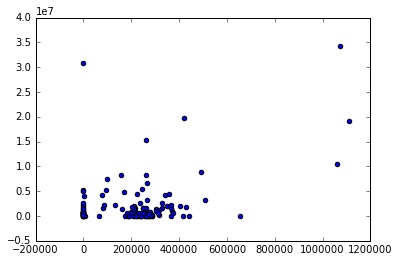

In [3]:
#load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

#there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

#### Predict Two Clusters with K-Means

In [4]:
from sklearn.cluster import KMeans

clust2 = KMeans(n_clusters=2)
clust2.fit(finance_features)
pred = clust2.predict(finance_features)

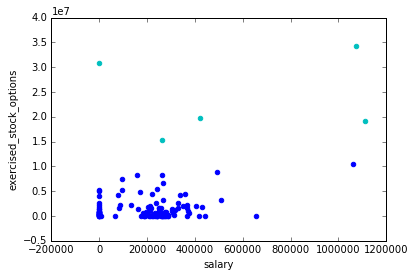

In [5]:
Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)

Obviously something is not right here.  Let's retry with 3 clusters this time:

#### Create Clusters Using Three Features

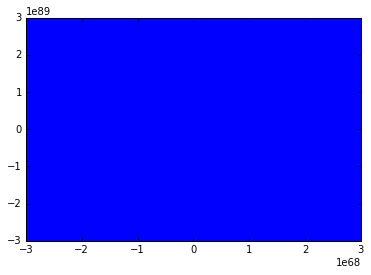

In [6]:
#include third feature in data
feature_1 = 'salary'
feature_2 = 'exercised_stock_options'
feature_3 = 'total_payments'
poi  = 'poi'
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list)
poi, finance_features = targetFeatureSplit(data)


for f1, f2, f3 in finance_features:
    plt.scatter(f1, f2, f3)
plt.show()

##### Train with three features

In [7]:
clust3 = KMeans(n_clusters=2)
clust3.fit(finance_features)
pred3 = clust3.predict(finance_features)

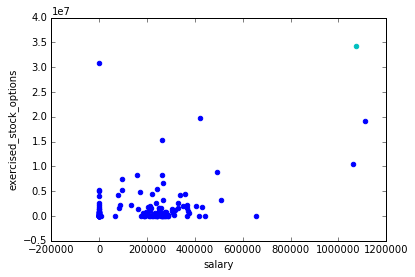

In [8]:
Draw(pred3, finance_features, poi, mark_poi=False, name="clusters3.pdf", f1_name=feature_1, f2_name=feature_2)

Even with a third feature the clustering is poor.

### Sneak Peak for Data Scaling

Find the max and min values in the 'exerised_stock_options' feature 

In [9]:
options = []

for poi in data_dict:
    if data_dict[poi]['exercised_stock_options'] != 'NaN':
        options.append(data_dict[poi]['exercised_stock_options'])
        
print 'The max exercised option is: ', max(options)
print 'The min exercised option is: ', min(options)

The max exercised option is:  34348384
The min exercised option is:  3285


Repeat for the 'salary' feature

In [10]:
sal = []

for poi in data_dict:
    if data_dict[poi]['salary'] != 'NaN':
        sal.append(data_dict[poi]['salary'])
        
print 'The max salary is: ', max(sal)
print 'The min salary is: ', min(sal)

The max salary is:  1111258
The min salary is:  477
